# Nipype processing pipeline for fMRI data
This notebook describes the construction of a processing pipeline for fMRI data, 
partly based on an existing pipeline coded in MATLAB. It uses the [nipype](http://nipy.sourceforge.net/nipype/) environment
(Gorgolewski K., et al. (2011). Front. Neurinform. 5:13), in which a combination of
FSL-software, shell commands, R-code (mainly plotting with ggplot2), and custom 
Python scripts are used. This pipeline aims at easy, parallel (pre)processing of 
fMRI data for univariate and multivariate analyses. In the future, this pipeline 
should prepare single-trial fMRI data to be analysed with the scikit-learn package. 

Author: Lukas Snoek, University of Amsterdam, lukassnoek@gmail.com

To do:
- Physiological noise regressors in FSL >> write script using FSL's PNM
- Implement call to matlab-script of Steven's MSTC-function
- Use absolute paths in glob.glob >> funcDirs: USE os.path.abspath()

Notes to Self:
- If there is no output, check the directory! (print os.getwd())
- import deeply nested modules with the "as" suffix

Cool stuff:
- Start using bookmarks using %bookmark name (pwd gets saved into "name")
- %alias for (long) shell commands
- %run -t (timit, but once for one script)
- %run -p (runs profiler, time for each function in script)

## Packages and settings
Below, necessary packages are imported and some pipeline-specific variables are defined.


In [1]:
# Importing necessary packages
%pylab inline
import nipype.interfaces.fsl as fsl
import nipype.interfaces.io as nio
import nipype.pipeline.engine as pe
import nipype.interfaces.utility as util
from IPython.display import Image
import os
import glob
import warnings
import shutil

import sys
sys.path.append("/home/lukas/Dropbox/ResMas_UvA/Thesis/Git/Analysis_scripts/modules")

Populating the interactive namespace from numpy and matplotlib


This is how the directory structure should look like:

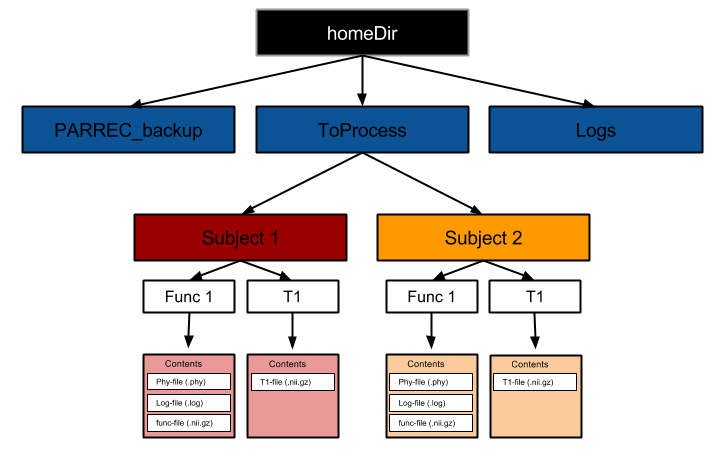

In [2]:
Image(filename='nipype_dirstructure.png')

In [2]:
# Specification of pipeline-general variables
homeDir = '/media/lukas/Data/Sample_fMRI' 
ToProcess = homeDir + '/ToProcess'
subject_stem = 'HWW_'
study_stem = 'PM'

# Physiological files should have the extension .phy (not .log, bc of confusion with presentation-files)

## Creation of folder structure
Given that all files are dumped in the homeDir, the code below sorts and stores the files in specific subject-directories with appropriate subdirectories for different structural (T1) and functional files. Also, to prepare processing with FSL, par/rec files are converted to zipped nifti (nii.gz) files. The original par/rec files stored in a back-up folder

In [3]:
import createDirStructure as cds
os.chdir(homeDir)

In [7]:
cds.convert_parrec2nii(homeDir, remove_nifti = 1)
cds.backup_parrec(homeDir)

Working on par/rec conversion ...
Converted 8 files
Back-up completed for 8 files


In [8]:
cds.movefiles_ToProcess(homeDir, subject_stem = 'HWW_')

Moved 1 files to ToProcess


In [5]:
cds.movefiles_subjectdirs(subject_stem, ToProcess)

Created the following subdirs for HWW_007: 
PM_Zinnen2
sT13DTFE_P25_S2_3m
PM_HWW
PM_Zinnen1


Created the following subdirs for HWW_008: 
PM_HWW
PM_Zinnen1
PM_Zinnen2
sT13DTFE_P25_S2_3m




createDirStructure.py:95: UserWarning: There are 1 unallocated files in ToProcess
  warnings.warn('There are %s unallocated files in ToProcess' % unallocated)


By now, there should be a log-dir, backup-dir, and most importantly a ToProcess-dir, where all preprocessing will be done. Below, the ToProcess directory will be structured as containing subject-subdirectories, which in turn contain separate subdirectories for different functional and a structural (T1) directory.

In [11]:
# Start nipype
T1_paths,T1_names = cds.get_filepaths('WIP_sT1',ToProcess)
skullstrip_outpaths = [os.path.dirname(path) + '/betted.nii.gz' for path in T1_paths]

skullstrip = fsl.BET()
skullstrip.inputs.in_file = T1_paths[0]
bet_results = skullstrip.run()

#skullstrip = pe.MapNode(interface = fsl.BET(), name="skullstrip", iterfield = ['in_file'])
#smooth = pe.MapNode(interface = fsl.IsotropicSmooth(), name="smooth", iterfield = ['in_file'])
#skullstrip.inputs.in_file = T1_paths
#skullstrip.inputs.out_file = "test"
#skullstrip.
#bet_results = skullstrip.run()

bet /media/lukas/Data/Sample_fMRI/ToProcess/HWW_008/sT13DTFE_P25_S2_3m/HWW_008_WIP_sT13DTFE_P25_S2_3m_SENSE_3_1.nii.gz /media/lukas/Data/Sample_fMRI/HWW_008_WIP_sT13DTFE_P25_S2_3m_SENSE_3_1_brain.nii.gz


In [11]:
%ls

Logs/  PARREC_backup/  ToProcess/
